In [35]:
import geopandas as gpd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import shapely

In [87]:
# SOURCE: https://datos.crtm.es/maps/f3859438e5504a6b9ca745880f72ef1b/about

df = pd.read_csv('metro_data/Datos_abiertos__Elementos_de_la_Red_de_Metro.csv')
estaciones = gpd.read_file('metro_data/estaciones.geojson')
tramos = gpd.read_file('metro_data/tramos.geojson')

In [88]:
df.shape

(556, 40)

In [89]:
df.head(2)

,OBJECTID,IDTRAMO,FECHAACTUAL,MODO,CODIGOITINERARIO,CODIGOGESTIONLINEA,NUMEROLINEAUSUARIO,SENTIDO,TIPOITINERARIO,CODIGOESTACION,...,CODMUN_LINEA,IDFTRAMO,CODIGOOBSERVACION,CODIGOSUBLINEA,DENOMINACION_SAE,IDFLINEA,IDFITINERARIO,IDFESTACION,IDFPOSTE,IDFANDEN
0,1,4_336284_278__755_I,20150709,4,336284,102,10b,1,1,278,...,NaN,4__10_B____1_IT_1_4_278__755_TI_I_7,NaN,NaN,NaN,4__10_B__,4__10_B____1_IT_1,4_278,4_278_,4_278_755
1,2,4_336285_278__756_I,20150709,4,336285,102,10b,2,1,278,...,NaN,4__10_B____2_IT_1_4_278__756_TI_I_5,NaN,NaN,NaN,4__10_B__,4__10_B____2_IT_1,4_278,4_278_,4_278_756


<Axes: >

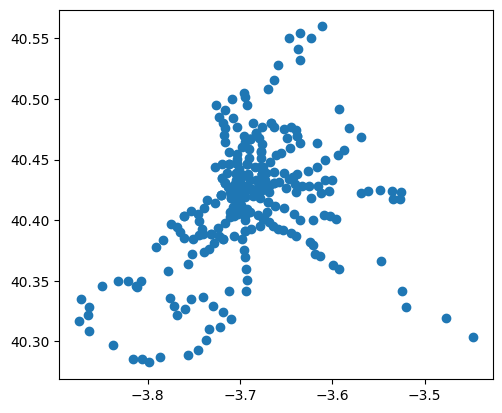

In [90]:
estaciones.plot()

<Axes: >

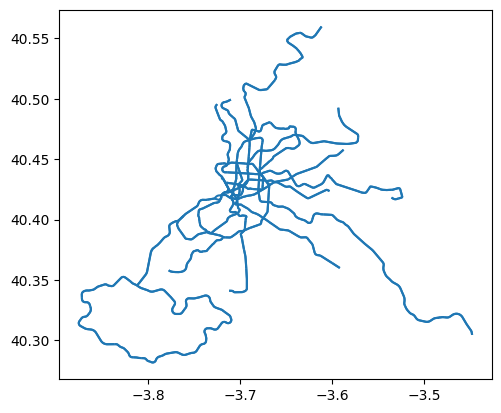

In [91]:
tramos.plot()

In [92]:
tramos.geometry

0      LINESTRING (-3.63573 40.53180, -3.63648 40.531...
1      LINESTRING (-3.66231 40.51541, -3.66176 40.516...
2      LINESTRING (-3.63796 40.54103, -3.63607 40.539...
3      LINESTRING (-3.65891 40.52760, -3.65848 40.527...
4      LINESTRING (-3.64715 40.55023, -3.64740 40.550...
                             ...                        
551    LINESTRING (-3.62403 40.55088, -3.62846 40.551...
552    LINESTRING (-3.64718 40.55024, -3.64564 40.551...
553    LINESTRING (-3.61145 40.55984, -3.61810 40.552...
554    LINESTRING (-3.63558 40.55450, -3.63472 40.554...
555    LINESTRING (-3.62402 40.55092, -3.62333 40.550...
Name: geometry, Length: 556, dtype: geometry

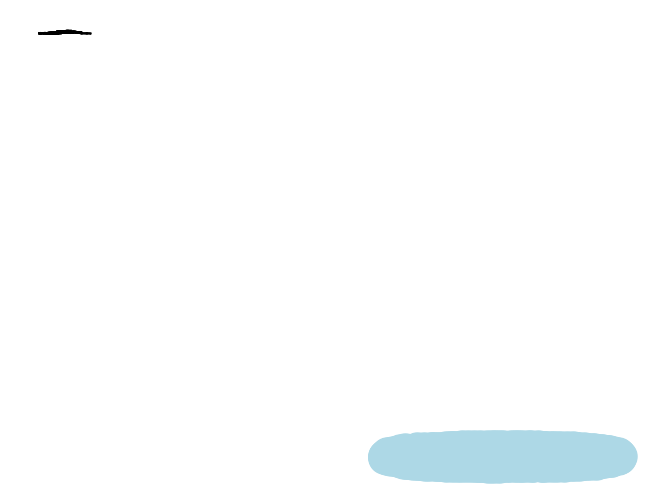

In [97]:
G = nx.Graph()

from shapely.geometry import Point, LineString


for idx, row in estaciones.iterrows():
    G.add_node(row['geometry'], pos=(row.geometry.x, row.geometry.y))

# Add edges
for idx, row in tramos.iterrows():
    line = row.geometry
    source_point = Point(line.coords[0])
    target_point = Point(line.coords[-1])
    G.add_edge(source_point, target_point, geometry=line)

# Optionally, visualize the graph
import matplotlib.pyplot as plt

nx.draw(G, with_labels=False, node_size=500, node_color='lightblue', font_size=10, font_color='black')

# Draw edges with their geometries
for u, v, data in G.edges(data=True):
    ls = data['geometry']
    xs, ys = ls.xy
    plt.plot(xs, ys, 'k-')

plt.show()

In [ ]:
import momepy #https://networkx.org/documentation/stable/auto_examples/geospatial/plot_lines.html
import networkx as nx
from contextily import add_basemap
from libpysal import weights

In [76]:
G_momepy = momepy.gdf_to_nx(tramos, approach="primal")

c:\Users\rqg886\AppData\Local\Programs\Python\Python312\Lib\site-packages\momepy\utils.py:252: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


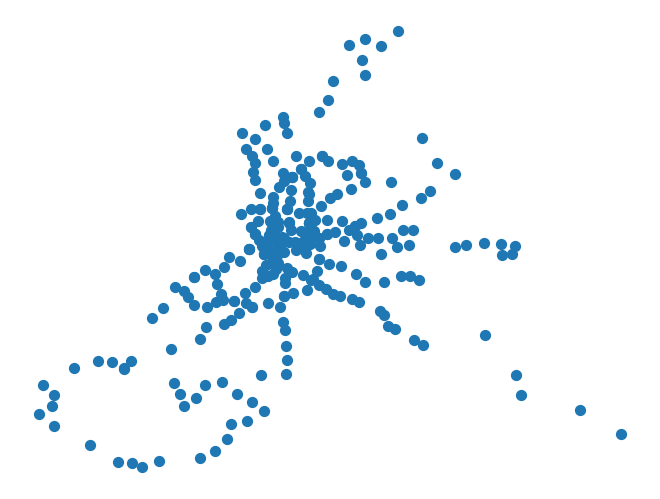

In [77]:
# Create a graph
G = nx.Graph()

# Add nodes (stations) with their names and coordinates
for idx, row in estaciones.iterrows():
    station_id = row['IDESTACION']
    station_name = row['DENOMINACION']
    coordinates = row['geometry']
    
    G.add_node(station_id, name=station_name, pos=(coordinates.x, coordinates.y))

# Add edges (connections) based on tramos
for edge in G_momepy.edges():
    # Ensure both nodes exist in G_combined before adding the edge
    node_a, node_b = edge
    if node_a in G.nodes and node_b in G.nodes:
        G.add_edge(node_a, node_b)


# Draw the graph with positions based on geographic coordinates
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=False, labels=nx.get_node_attributes(G, 'name'), node_size=50, font_size=8)



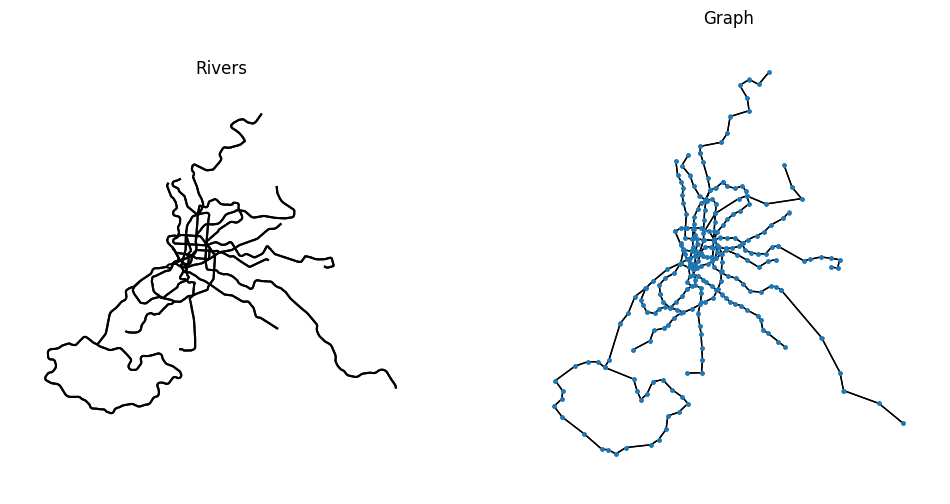

In [74]:
positions = {n: [n[0], n[1]] for n in list(G.nodes)}

# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
tramos.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Rivers", "Graph")[i])
    facet.axis("off")
nx.draw(G, positions, ax=ax[1], node_size=5)